# 5. Linear Regression Analysis

### 0. List of Contents
#### 1. Importing Libraries and Dataframes
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

#### During my exploratory visual analysis that if I compare proportion of the ever married and currently married people for the same sex, age group, period of time and country) there is a strong positive relationship between those values. This means that if in Afghanistan between 1972 and 1974 for men's age group of 15-19 grows then so is the proportion of currently married people. 

### 1. Importing Libraries and Dataframes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [2]:
# Creating ppath
path=r'/Users/fru.s/Documents/CF - Data Analytics/2.6. Sourcing Open Data/Open Source Data Analysis/02 Data/Prepared Data/'

In [3]:
#importing dataframe
ms=pd.read_excel(os.path.join(path,'Tableau DS.xlsx'),sheet_name='SMAM + EM')

### 2. Data Cleaning

In [4]:
ms.columns

Index(['Country or area', 'YearStart', 'YearStart decade', 'YearEnd', 'Sex',
       'YearStartSex', 'DataValue_ave', 'concat', 'EM 20-64 AVG',
       'EM 20-64 Median', 'Region Name', 'Sub-region Name'],
      dtype='object')

In [5]:
ms.head(10)

,Country or area,YearStart,YearStart decade,YearEnd,Sex,YearStartSex,DataValue_ave,concat,EM 20-64 AVG,EM 20-64 Median,Region Name,Sub-region Name
0,Afghanistan,1972,1970,1974,Men,19721974Men,26.0,Afghanistan19721974Men,83.700000,94.10,Asia,Southern Asia
1,Afghanistan,1979,1970,1979,Men,19791979Men,25.3,Afghanistan19791979Men,84.168889,94.21,Asia,Southern Asia
2,Afghanistan,2015,2010,2016,Men,20152016Men,24.5,Afghanistan20152016Men,89.133333,99.10,Asia,Southern Asia
3,Afghanistan,1972,1970,1974,Women,19721974Women,18.1,Afghanistan19721974Women,97.311111,98.50,Asia,Southern Asia
4,Afghanistan,1979,1970,1979,Women,19791979Women,17.8,Afghanistan19791979Women,97.761111,98.78,Asia,Southern Asia
5,Afghanistan,2010,2010,2010,Women,20102010Women,21.5,Afghanistan20102010Women,91.666667,97.60,Asia,Southern Asia
6,Afghanistan,2010,2010,2011,Women,20102011Women,21.2,Afghanistan20102011Women,92.155000,97.82,Asia,Southern Asia
7,Afghanistan,2015,2010,2016,Women,20152016Women,21.4,Afghanistan20152016Women,94.797778,99.67,Asia,Southern Asia
8,Albania,1989,1980,1989,Men,19891989Men,27.0,Albania19891989Men,81.607778,96.50,Europe,Southern Europe
9,Albania,2000,2000,2000,Men,20002000Men,28.5,Albania20002000Men,80.134444,97.52,Europe,Southern Europe


In [6]:
ms.shape

(4062, 12)

In [7]:
# Check for missing values
ms.isnull().sum()

Country or area       0
YearStart             0
YearStart decade      0
YearEnd               0
Sex                   0
YearStartSex          0
DataValue_ave         0
concat                0
EM 20-64 AVG        299
EM 20-64 Median     299
Region Name          47
Sub-region Name      47
dtype: int64

In [8]:
ms.dropna(inplace = True)

In [9]:
dups = ms[ms.duplicated()]

In [10]:
dups

,Country or area,YearStart,YearStart decade,YearEnd,Sex,YearStartSex,DataValue_ave,concat,EM 20-64 AVG,EM 20-64 Median,Region Name,Sub-region Name


In [11]:
ms.describe()

,YearStart,YearStart decade,YearEnd,DataValue_ave,EM 20-64 AVG,EM 20-64 Median
count,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000,3763.000000
mean,1997.039065,1993.165028,1997.123572,26.289840,78.290075,87.810170
std,13.965889,13.818953,13.988428,3.997958,11.495959,10.388437
min,1960.000000,1960.000000,1960.000000,14.400000,37.027778,39.290000
25%,1987.000000,1980.000000,1987.000000,23.300000,71.625000,83.955000
50%,2000.000000,2000.000000,2000.000000,26.100000,80.168889,90.710000
75%,2009.000000,2000.000000,2009.500000,29.200000,86.433333,95.270000
max,2019.000000,2010.000000,2019.000000,36.500000,99.950000,100.250000


/Users/fru.s/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EM 20-64 AVG', ylabel='Density'>

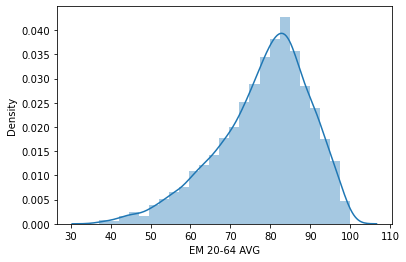

In [13]:
#extreme values check
sns.distplot(ms['EM 20-64 AVG'], bins=25)

#### no outliers

### 3. Data prep for regression analysis

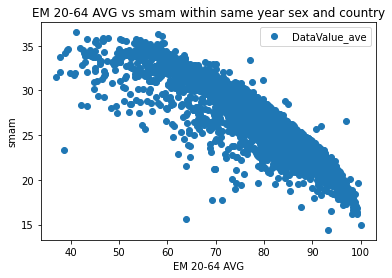

In [14]:
# Create a scatterplot to check again how the chosen variables plot against each other

ms.plot(x = 'EM 20-64 AVG', y='DataValue_ave',style='o') 
plt.title('EM 20-64 AVG vs smam within same year sex and country')  
plt.xlabel('EM 20-64 AVG')  
plt.ylabel('smam')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = ms['EM 20-64 AVG'].values.reshape(-1,1)
y = ms['DataValue_ave'].values.reshape(-1,1)

In [16]:
X

array([[83.7       ],
       [84.16888889],
       [89.13333333],
       ...,
       [92.46333333],
       [93.82111111],
       [92.47777778]])

In [17]:
y

array([[26.  ],
       [25.3 ],
       [24.5 ],
       ...,
       [20.3 ],
       [20.55],
       [21.1 ]])

In [18]:
# Splitting data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [19]:
# Creating a regression object

regression = LinearRegression()

In [20]:
# Fitting the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

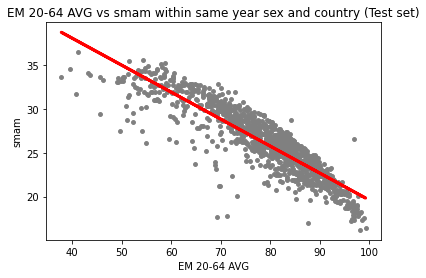

In [22]:
# Creating a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('EM 20-64 AVG vs smam within same year sex and country (Test set)')
plot_test.xlabel('EM 20-64 AVG')
plot_test.ylabel('smam')
plot_test.show()

In [23]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [24]:
# Printing the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.30816344]]
Mean squared error:  3.3474677790216356
R2 score:  0.7826962481834894


#### Slope: we have a negative slope, signifyig a negative relationship between variables
#### MSE: is small compared to the data points, it means the points are close to the regression line, this means the regression is an accurate representation of the data
#### The R2 score means that 78% sucess rate, which isn't very high though

In [25]:
y_predicted

array([[22.92976426],
       [24.09599167],
       [22.20078654],
       ...,
       [27.85044952],
       [31.91067399],
       [23.8121389 ]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,23.1,22.929764
1,23.6,24.095992
2,21.1,22.200787
3,24.7,24.446956
4,21.9,24.345262
5,22.6,24.118762
6,22.4,23.753588
7,22.1,23.022213
8,22.1,23.788171
9,33.7,38.769365


#### Running the regression analysis made me sure that my dataset isn't the best for regression analyis, as it contains data only related to marital status and marriage. My theory is that by running time series anlysis I should discover better insights on global and regional trends